In [1]:
#dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st

#api key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

#output CSV
output_data_file = "output_data_cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [18]:
#lists for storage
responses = []
city_id = []
city_name = []
cloud = []
country = []
date = []
hum = []
lat = []
lng = []
max_temp = []
wind_speed = []

r_num = 1
#build url and query_url
url = "http://api.openweathermap.org/data/2.5/weather?"
for city in cities:
    try:
        query_url = url + "appid=" + weather_api_key + "&q=" + city
        weather_data = requests.get(query_url)
        city_name.append(weather_data.json()['name'])
        cloud.append(weather_data.json()['clouds']['all'])
        country.append(weather_data.json()['sys']['country'])
        date.append(weather_data.json()['dt'])
        hum.append(weather_data.json()['main']['humidity'])
        lat.append(weather_data.json()['coord']['lat'])
        lng.append(weather_data.json()['coord']['lon'])
        max_temp.append(1.8 * ((weather_data.json()['main']['temp_max'])-273) + 32)
        wind_speed.append(weather_data.json()['wind']['speed'])
        print(f"Processing request number {r_num}:{city}")
        r_num = r_num + 1
    except KeyError:
        print("city not found. skipping...")


Processing request number 1:ornskoldsvik
Processing request number 2:busselton
Processing request number 3:nikolskoye
Processing request number 4:hokitika
Processing request number 5:murchison
Processing request number 6:rikitea
city not found. skipping...
Processing request number 7:mataura
Processing request number 8:severo-kurilsk
Processing request number 9:ancud
Processing request number 10:petropavlovsk-kamchatskiy
Processing request number 11:avarua
Processing request number 12:shelburne
Processing request number 13:ushuaia
Processing request number 14:birjand
Processing request number 15:qaanaaq
Processing request number 16:khatanga
Processing request number 17:san francisco
Processing request number 18:punta arenas
Processing request number 19:genhe
Processing request number 20:puerto ayora
Processing request number 21:klaksvik
Processing request number 22:hobart
Processing request number 23:honningsvag
Processing request number 24:new norfolk
Processing request number 25:port

Processing request number 193:constitucion
Processing request number 194:san cristobal
Processing request number 195:winnemucca
city not found. skipping...
Processing request number 196:san pedro
Processing request number 197:ust-kulom
Processing request number 198:flin flon
Processing request number 199:mar del plata
Processing request number 200:kushiro
Processing request number 201:maasin
Processing request number 202:parakou
Processing request number 203:mount isa
city not found. skipping...
Processing request number 204:nicoya
Processing request number 205:victoria
Processing request number 206:cockburn town
Processing request number 207:sistranda
Processing request number 208:yellowknife
city not found. skipping...
Processing request number 209:maceio
Processing request number 210:fuxin
Processing request number 211:havelock
Processing request number 212:saint george
Processing request number 213:cuamba
Processing request number 214:ko samui
Processing request number 215:lata
Pro

Processing request number 394:usinsk
Processing request number 395:salalah
Processing request number 396:san quintin
Processing request number 397:riohacha
Processing request number 398:isla mujeres
Processing request number 399:matveyevka
Processing request number 400:anan
city not found. skipping...
Processing request number 401:caravelas
Processing request number 402:bodden town
Processing request number 403:pampa
Processing request number 404:jodar
Processing request number 405:alice springs
Processing request number 406:skjervoy
Processing request number 407:san sebastian
Processing request number 408:vila velha
Processing request number 409:dryden
Processing request number 410:claudio
Processing request number 411:mnogovershinnyy
Processing request number 412:ostrovnoy
Processing request number 413:muskegon
Processing request number 414:port augusta
Processing request number 415:korla
Processing request number 416:ridgecrest
Processing request number 417:iracoubo
Processing reque

In [24]:
#construct a DataFrame for weather data
weather_data_df = pd.DataFrame({"City Name": city_name, "Cloudiness": cloud, "Country": country, "Date": date, "Humidity": hum, "Lat": lat, "Lng": lng, "Max Temp (F)": max_temp, "Wind Speed": wind_speed})
weather_data_df.head()



,City Name,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,Örnsköldsvik,13,SE,1618690387,86,63.2909,18.7153,34.070,2.06
1,Busselton,0,AU,1618690871,88,-33.6500,115.3333,51.278,3.95
2,Nikolskoye,0,RU,1618690871,34,59.7035,30.7861,48.470,4.00
3,Hokitika,100,NZ,1618690221,81,-42.7167,170.9667,51.962,0.64
4,Murchison,95,NZ,1618690388,88,-41.8000,172.3333,47.444,0.88


In [26]:
weather_data_df["Humidity"].max()

100

In [27]:
#export the DataFrame to a csv
weather_data_df.to_csv(output_data_file)

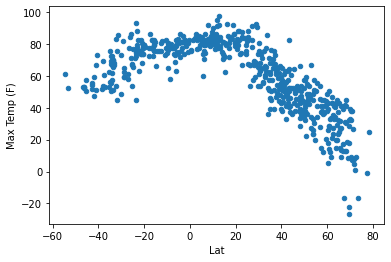

In [28]:
#create a scatter plot showing Temp and Lat
temp_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Max Temp (F)")
#the code is ploting points based on the Lat and Max Temp for each city

plt.savefig("temp_lat.png")

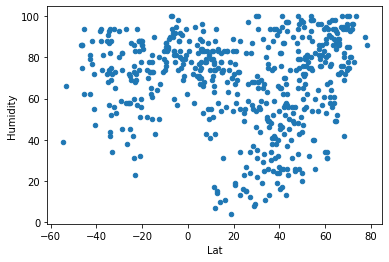

In [29]:
#create a scatter plot showing Humidity and Lat
hum_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Humidity")
#the code is plotting points based on the Lat and Humidity of each city

plt.savefig("hum_lat.png")

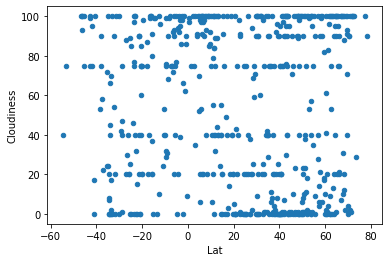

In [30]:
#create a scatter plot based on Cloudiness and Lat
cloud_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Cloudiness")
#the code is plotting points based on the Cloudiness and Lat of each city

plt.savefig("cloud_lat.png")

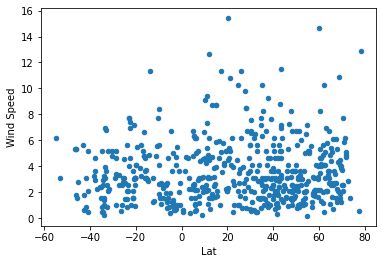

In [31]:
#create a scatter plot based on Wind Speed and Lat
wind_lat_plot = weather_data_df.plot.scatter(x="Lat", y="Wind Speed")
#the code is plotting points based on the wind speed and lat of each city

plt.savefig("ws_lat.png")

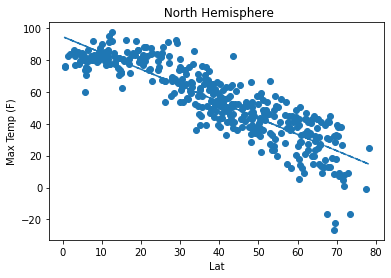

as Lat increases (away from equator) the max temp falls


<Figure size 432x288 with 0 Axes>

In [32]:
#make df for north and south hem
n_hem_df = weather_data_df.drop(weather_data_df[weather_data_df["Lat"] < 0].index)
s_hem_df = weather_data_df.drop(weather_data_df[weather_data_df["Lat"] >= 0].index)

#plot North Hem and Max Temp 
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,7]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,7].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title(" North Hemisphere")
plt.show()

print("as Lat increases (away from equator) the max temp falls")

plt.savefig("n_temp_lat.png")

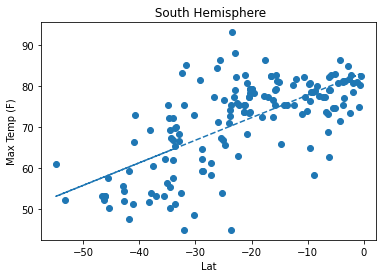

as Lat increases (toward equator) the max temps increase
this shows it tends to be warmer close to the equator


<Figure size 432x288 with 0 Axes>

In [33]:
#plot South Hem and Max Temp
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,7]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,7].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Max Temp (F)")
plt.title(" South Hemisphere")
plt.show()

print("as Lat increases (toward equator) the max temps increase")
print("this shows it tends to be warmer close to the equator")
plt.savefig("s_temp_lat.png")

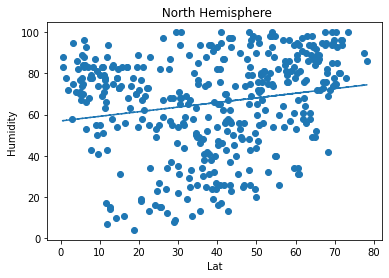

as Lat increases so does Humidity but not to a signifigant amount


<Figure size 432x288 with 0 Axes>

In [34]:
#plot North Hem and Humididty
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,4]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,4].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title(" North Hemisphere")
plt.show()

print("as Lat increases so does Humidity but not to a signifigant amount")
plt.savefig("n_hum_lat.png")

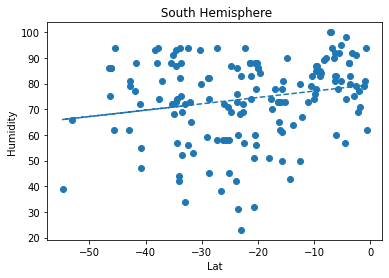

little to not corilation between Humidity and Lat


<Figure size 432x288 with 0 Axes>

In [35]:
#plot South Hem and Humididty
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,4]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,4].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title(" South Hemisphere")
plt.show()

#as lat increases so does Humidity

print("little to not corilation between Humidity and Lat")

plt.savefig("s_hum_lat.png")

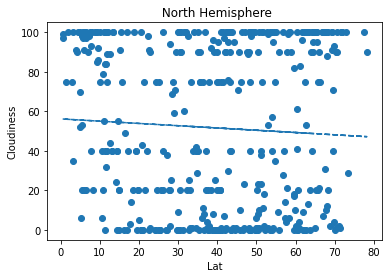

no corrilation between Cloudiness and Lat


<Figure size 432x288 with 0 Axes>

In [36]:
#plot North Hem and Cloudiness
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,1]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,1].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title(" North Hemisphere")
plt.show()
print("no corrilation between Cloudiness and Lat")
plt.savefig("n_cloud_lat.png")

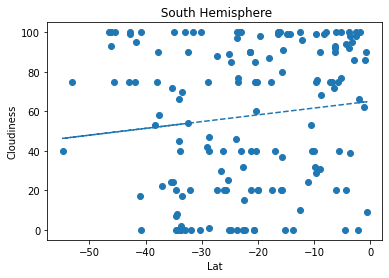

no corrilation between Cloudiness and Lat


<Figure size 432x288 with 0 Axes>

In [37]:
#plot South Hem and Cloudiness
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,1]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,1].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title(" South Hemisphere")
plt.show()

print("no corrilation between Cloudiness and Lat")
plt.savefig("s_cloud_lat.png")

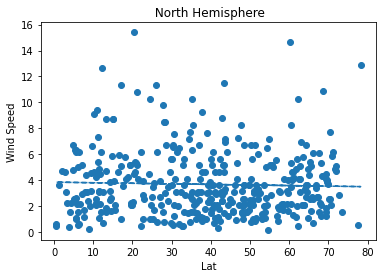

no corrilation between Wind Speed and Lat


<Figure size 432x288 with 0 Axes>

In [38]:
#plot North Hem and Wind Speed
x = n_hem_df.iloc[:,5]
y = n_hem_df.iloc[:,8]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = n_hem_df.iloc[:,5].values.reshape(-1,1)
y = n_hem_df.iloc[:,8].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title(" North Hemisphere")
plt.show()

print("no corrilation between Wind Speed and Lat")
plt.savefig("n_wind_lat.png")

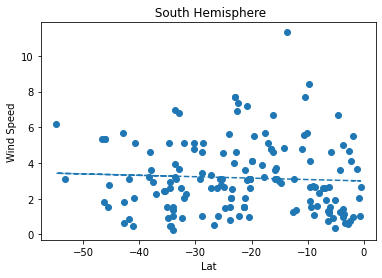

no corrilation between Wind Speed and Lat


<Figure size 432x288 with 0 Axes>

In [39]:
#plot South Hem and Wind Speed
x = s_hem_df.iloc[:,5]
y = s_hem_df.iloc[:,8]

tl_slope, tl_int, tl_r, tl_p, tl_str_err = st.linregress(x,y)
tl_fit = tl_slope * x + tl_int

x = s_hem_df.iloc[:,5].values.reshape(-1,1)
y = s_hem_df.iloc[:,8].values.reshape(-1,1)
plt.scatter(x,y)
plt.plot(x,tl_fit,"--")
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.title(" South Hemisphere")
plt.show()

print("no corrilation between Wind Speed and Lat")
plt.savefig('s_wind_lat.png')